<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Exploration de données d'enquête en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a>:  explication du seuil de revenu 

### Résumé
Analyse de données extraites d'un recensement aux USA de 1994. Préparation des données, exploration élémentaire et multidimensionnelle ([ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)), [classification non supervisée](http://wikistat.fr/pdf/st-m-explo-classif.pdf). L'objectif est de préparer l'[étape suivante](https://github.com/wikistat/Apprentissage/tree/master/Adult-Census) consistant à modéliser / prévoir le niveau de revenu.

## Introduction
Des données publiques disponibles sur le site [UCI repository](http://archive.ics.uci.edu/ml/) sont extraites de la base de données issue du recensement réalisé aux Etats Unis en 1994. Ces données son largement utilisées et font référence comme outil de *benchmark* pour comparer les performances de méthodes d’apprentissage ou modélisation statistique. L’objectif est alors de prévoir la variable binaire « revenu annuel » supérieur ou inférieur à 50k$. Le travail décrit dans ce document est un préalable, il propose une exploration des données pour en appréhender les grandes structures. Il ne s’agit pas encore de données massives mais 32.561 individus sont décrits par les 14 variables du tableau ci-dessous :

Num| Libellé |	Ensemble de valeurs
-|--|--|--
1|`Age`|	real
2|	`workClass`|	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
3|	`fnlwgt`|	real
4|	`education`|	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
5|	`educNum`|	integer
6|	`mariStat`|	Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
7|	`occup`|	Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
8|	`relationship`|	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
9|	`origEthn`|	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
10|	`sex`|	Female, Male
11|	`capitalGain`|	real  
12|	`capitalLoss`|	real
13|	`hoursWeek`|	real
14|	`nativCountry`|	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
15|	`income`|		>50K, <=50K


## 1 Préparation des données


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#Lecture
listeVar=['Age','workClass', 'fnlwgt', 'education', 'educNum', 'mariStat', 'occup', 'relationship',
          'origEthn', 'sex', 'capitalGain', 'capitalLoss', 'hoursWeek', 'nativCountry', 'income']

path="https://www.math.univ-toulouse.fr/~besse/Wikistat/data/adultCensus.dat"
dataBase = pd.read_csv(path, sep=',', header=None, index_col=False, names=listeVar,dtype={"workClass":object,"education":object,"mariStat":object,"occup":object,"relationship":object,"origEthn":object,"sex":object,"nativCountry":object,"income":object})
dataBase.head()

,Age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Pour chaque variable qualitative, on renomme les modalités afin de pouvoir les manipuler plus facilement. Durant cette manipulation, on regroupe certaines modalités afin de ne plus avoir des modalités à trop faible effectif.

In [3]:
#dataBase["workClass"]=pd.Categorical(dataBase["workClass"],ordered=False)
#dataBase["education"]=pd.Categorical(dataBase["education"],ordered=False)
#dataBase["mariStat"]=pd.Categorical(dataBase["mariStat"],ordered=False)
#dataBase["occup"]=pd.Categorical(dataBase["occup"],ordered=False)
#dataBase["relationship"]=pd.Categorical(dataBase["relationship"],ordered=False)
#dataBase["origEthn"]=pd.Categorical(dataBase["origEthn"],ordered=False)
#dataBase["sex"]=pd.Categorical(dataBase["sex"],ordered=False)
#dataBase["nativCountry"]=pd.Categorical(dataBase["nativCountry"],ordered=False)
#dataBase["income"]=pd.Categorical(dataBase["income"],ordered=False)
dataBase.dtypes

Age              int64
workClass       object
fnlwgt           int64
education       object
educNum          int64
mariStat        object
occup           object
relationship    object
origEthn        object
sex             object
capitalGain      int64
capitalLoss      int64
hoursWeek        int64
nativCountry    object
income          object
dtype: object

In [4]:
#workClass 
cat_workClass={" federal-gov": "Federal-Govt",
               " local-gov": "Other-Govt",
               " state-gov": "Other-Govt",
               " private": "Private",
               " self-emp-inc": "Self-Employed",
               " self-emp-not-inc": "Self-Employed",
               " without-pay": "Not-Working",
               " never-worked": "Not-Working"}
dataBase["workClass"]=dataBase.workClass.map(str.lower).map(cat_workClass)

In [5]:
#education
cat_education={" 10th": "Dropout",
               " 11th": "Dropout",
               " 12th": "Dropout",
               " 1st-4th":"Dropout",
               " 5th-6th": "Dropout",
               " 7th-8th": "Dropout",
               " 9th": "Dropout",
               " assoc-acdm": "Associates",
               " assoc-voc": "Associates",
               " bachelors": "Bachelors",
               " doctorate": "Doctorate",
               " hs-grad": "HS-Graduate",
               " masters": "Masters",
               " preschool": "Dropout",
               " prof-school": "Prof-School",
               " some-college": "HS-Graduate"}
dataBase["education"]=dataBase.education.map(str.lower).map(cat_education)

In [6]:
#mariStat
cat_mariStat={" never-married" : "Never-Married",
              " married-af-spouse" : "Married",
              " married-civ-spouse" : "Married",
              " married-spouse-absent" : "Not-Married",
              " separated" : "Not-Married",
              " divorced" : "Not-Married",
              " widowed" : "Widowed"
             }
dataBase["mariStat"]=dataBase.mariStat.map(str.lower).map(cat_mariStat)

In [7]:
#occup
cat_occup={" adm-clerical": "Admin",
           #" armed-forces": "Military",
           " craft-repair": "Blue-Collar",
           " exec-managerial": "White-Collar",
           " farming-fishing": "Blue-Collar",
           " handlers-cleaners": "Blue-Collar",
           " machine-op-inspct": "Blue-Collar",
           " other-service": "Service",
           " priv-house-serv": "Service",
           " prof-specialty": "Professional",
           " protective-serv": "Other-occups",
           " sales": "Sales",
           " tech-support": "Other-occups",
           " transport-moving": "Blue-Collar",
          }
dataBase["occup"]=dataBase.occup.map(str.lower).map(cat_occup)
#dataBase["occup"]=dataBase["occup"].replace("Miltary",np.nan)

On n'incorpore pas militaire dans le dictionaire des `occup`. La profession sera alors "Nan" dans la dataframe et sera supprimée par la suite. 

In [8]:
#origEthn
cat_origEthn={" white": "White",
              " black": "Black",
              " amer-indian-eskimo": "Amer-Indian",
              " asian-pac-islander": "Asian",
              " other": "Other"
             }
dataBase["origEthn"]=dataBase.origEthn.map(str.lower).map(cat_origEthn)

In [9]:
#nativCountry
cat_nativCountry={" cambodia": "SE-Asia",
                  " canada": "British-Commonwealth",
                  " china": "China",
                  " columbia": "South-America",
                  " cuba": "Other",
                  " dominican-republic": "Latin-America",
                  " ecuador": "South-America",
                  " el-salvador": "South-America",
                  " england": "British-Commonwealth",
                  " france": "Euro_1",
                  " germany": "Euro_1",
                  " greece": "Euro_2",
                  " guatemala": "Latin-America",
                  " haiti": "Latin-America",
                  " holand-netherlands": "Euro_1",
                  " honduras": "Latin-America",
                  " hong": "China",
                  " hungary": "Euro_2",
                  " india": "British-Commonwealth",
                  " iran": "Other",
                  " ireland": "British-Commonwealth",
                  " italy": "Euro_1",
                  " jamaica": "Latin-America",
                  " japan": "Other",
                  " laos": "SE-Asia",
                  " mexico": "Latin-America",
                  " nicaragua": "Latin-America",
                  " outlying-us(guam-usvi-etc)": "Latin-America",
                  " peru": "South-America",
                  " philippines": "SE-Asia",
                  " poland": "Euro_2",
                  " portugal": "Euro_2",
                  " puerto-rico": "Latin-America",
                  " scotland": "British-Commonwealth",
                  " south": "Euro_2",
                  " taiwan": "China",
                  " thailand": "SE-Asia",
                  " trinadad&tobago": "Latin-America",
                  " united-states": "United-States",
                  " vietnam": "SE-Asia",
                  " yugoslavia": "Euro_2"
                 }
dataBase["nativCountry"]=dataBase.nativCountry.map(str.lower).map(cat_nativCountry)

L'utilisation de "map" pour le regroupement des variables nous permet de remplacer automatiquement la valeur des variables des individus possédant un "?" par des "NaN". Cependant, une option lors de l'importation des données aurait pu nous permettre de corriger ce problème directement.

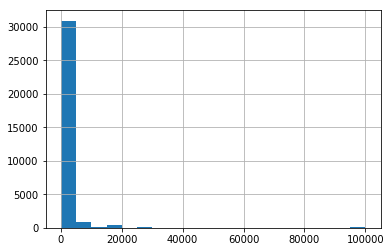

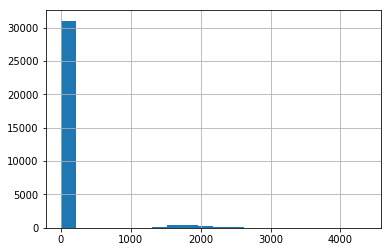

In [10]:
dataBase["capitalGain"].hist(bins=20)
plt.show()
dataBase["capitalLoss"].hist(bins=20)
plt.show()

Pour les variables "capitalGain" et "capitalLoss", la distribution est biaisée à droite car il y a quelques valeurs avec une très grande abscisse et donc éloignées de la majorité des valeurs. Nous effectuons donc une transformation logarithmique afin de rapprocher ces valeurs extrêmes.

In [11]:
#LcapitalGain et LcapitalLoss
dataBase["LcapitalGain"]=np.log(1+dataBase["capitalGain"])
dataBase["LcapitalLoss"]=np.log(1+dataBase["capitalLoss"])

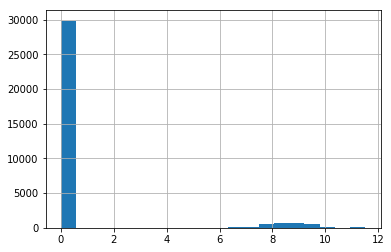

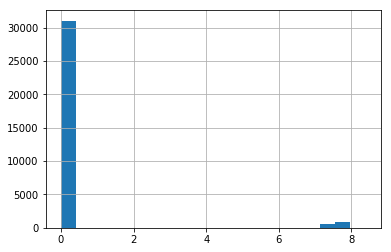

In [12]:
dataBase["LcapitalGain"].hist(bins=20)
plt.show()
dataBase["LcapitalLoss"].hist(bins=20)
plt.show()

On observe bien le rapprochement des valeurs extrêmes.

Ensuite, on transforme les variables quantitatives "capitalGain" et "capitalLoss" en variables qualitatives à 3 modalités, obtenues à partir du calcul de la médiane. Si les variables ont des valeurs négatives, elles seront placées dans la catégorie "None". Si elles sont comprises entre 0 et la médiane des valeurs positives, elles seront placées dans la catégorie "cgLow". Sinon, elles sont placées dans la catégorie "cgHigh".

In [13]:
#capitalGain et capitalLoss
import math
dataBase["capitalGain"]=pd.cut(dataBase.capitalGain,bins=[-math.inf,0,np.median(dataBase.capitalGain[dataBase.capitalGain>0]),+math.inf],labels=["None", "cgLow", "cgHigh"])
dataBase["capitalLoss"]=pd.cut(dataBase.capitalLoss,bins=[-math.inf,0,np.median(dataBase.capitalLoss[dataBase.capitalLoss>0]),+math.inf],labels=["None", "cgLow", "cgHigh"])

On transforme la variable "income" pour avoir des modalités plus éclairantes pour l'analyse.

In [14]:
dataBase["income"]=np.where(dataBase["income"]==" <=50K","incLow","incHigh")

On crée une nouvelle variable qualitative "ageQ", qui à partir de la variable "Age", situe un individu dans des modalités suivantes : "Ag1","Ag2","Ag3","Ag4","Ag5". On souhaite avoir le même effectif pour chaque modalité, on utilise la fonction "qcut" utilisant les quantiles.

In [15]:
dataBase["ageQ"]=pd.qcut(dataBase.Age,q=5,labels=["Ag1","Ag2","Ag3","Ag4","Ag5"]) 

On crée une nouvelle variable qualitative "hoursWeekQ", qui à partir de la variable "hoursWeek", situe un individu dans des modalités suivantes : "HW1","HW2","HW3".

In [16]:
dataBase["hoursWeekQ"]=pd.cut(dataBase.hoursWeek,bins=[0,39,41,100],labels=["HW1","HW2","HW3"])

On supprime les individus possédant des variables de valeur NaN.

In [17]:
dataBase = dataBase.dropna(axis=0)

In [18]:
dataBase

,Age,workClass,fnlwgt,education,educNum,mariStat,occup,relationship,origEthn,sex,capitalGain,capitalLoss,hoursWeek,nativCountry,income,LcapitalGain,LcapitalLoss,ageQ,hoursWeekQ
0,39,Other-Govt,77516,Bachelors,13,Never-Married,Admin,Not-in-family,White,Male,cgLow,None,40,United-States,incLow,7.684784,0.000000,Ag3,HW2
1,50,Self-Employed,83311,Bachelors,13,Married,White-Collar,Husband,White,Male,None,None,13,United-States,incLow,0.000000,0.000000,Ag4,HW1
2,38,Private,215646,HS-Graduate,9,Not-Married,Blue-Collar,Not-in-family,White,Male,None,None,40,United-States,incLow,0.000000,0.000000,Ag3,HW2
3,53,Private,234721,Dropout,7,Married,Blue-Collar,Husband,Black,Male,None,None,40,United-States,incLow,0.000000,0.000000,Ag5,HW2
4,28,Private,338409,Bachelors,13,Married,Professional,Wife,Black,Female,None,None,40,Other,incLow,0.000000,0.000000,Ag2,HW2
5,37,Private,284582,Masters,14,Married,White-Collar,Wife,White,Female,None,None,40,United-States,incLow,0.000000,0.000000,Ag3,HW2
6,49,Private,160187,Dropout,5,Not-Married,Service,Not-in-family,Black,Female,None,None,16,Latin-America,incLow,0.000000,0.000000,Ag4,HW1
7,52,Self-Employed,209642,HS-Graduate,9,Married,White-Collar,Husband,White,Male,None,None,45,United-States,incHigh,0.000000,0.000000,Ag5,HW3
8,31,Private,45781,Masters,14,Never-Married,Professional,Not-in-family,White,Female,cgHigh,None,50,United-States,incHigh,9.552866,0.000000,Ag2,HW3
9,42,Private,159449,Bachelors,13,Married,White-Collar,Husband,White,Male,cgLow,None,40,United-States,incHigh,8.552367,0.000000,Ag4,HW2


## 2 Description
**Q** Quelle est la population étudiée ? Quel est l’échantillon ?

**Q** Commenter, justifier les différentes transformations opérées. Repérer les variables quantitatives, qualitatives. Certaines (`age`, `hoursWeek`) sont présentes sous les deux types. Beaucoup de modalités on déjà été regroupées, notamment celles de `nativCountry` (voir le programme) certaines variables sont rendues qualitatives (`capitalLoss` ou `Gain`).

La popoulation étudiée est la population recensée aux Etats-Unis en 1994. L'échantillon que l'on va utiliser est celui des 30153 individus obtenus après nettoyage. 

Les regroupements de modalités ou modifications de classe ont été expliquées au fur et à mesure du nettoyage. 

In [19]:
dataBase[dataBase.select_dtypes(['object']).columns] = dataBase.select_dtypes(['object']).apply(lambda x: x.astype('category'))
dataBase.dtypes

Age                int64
workClass       category
fnlwgt             int64
education       category
educNum            int64
mariStat        category
occup           category
relationship    category
origEthn        category
sex             category
capitalGain     category
capitalLoss     category
hoursWeek          int64
nativCountry    category
income          category
LcapitalGain     float64
LcapitalLoss     float64
ageQ            category
hoursWeekQ      category
dtype: object

In [20]:
dataBase.describe()

,Age,fnlwgt,educNum,hoursWeek,LcapitalGain,LcapitalLoss
count,30153.000000,3.015300e+04,30153.000000,30153.000000,30153.000000,30153.000000
mean,38.440354,1.897862e+05,10.121315,40.931317,0.743869,0.355082
std,13.135197,1.056591e+05,2.550162,11.979579,2.470854,1.594700
min,17.000000,1.376900e+04,1.000000,1.000000,0.000000,0.000000
25%,28.000000,1.176180e+05,9.000000,40.000000,0.000000,0.000000
50%,37.000000,1.784210e+05,10.000000,40.000000,0.000000,0.000000
75%,47.000000,2.376240e+05,13.000000,45.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99.000000,11.512925,8.379539


/usr/local/insa/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/delvaux/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


[Text(0.5, 0, 'log(1+CapitalGain)')]

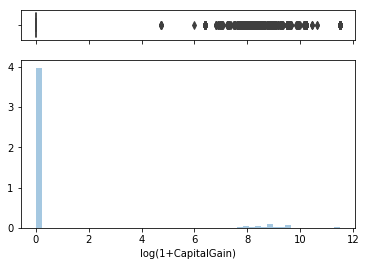

In [21]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(dataBase["LcapitalGain"], ax=ax_box)
sns.distplot(dataBase["LcapitalGain"], norm_hist=True, ax=ax_hist,kde=False)

ax_box.set(xlabel='')
ax_hist.set(xlabel='log(1+CapitalGain)')

**Q** Quels sont ces graphiques? Que dire de la transformation  opérée ? La variable CapitalLoss subit le même traitement.

Ce sont un boxplot et un histogramme de la variable LcapitalGain (=log(1+CapitalGain)). La transformation logarithmique effectuée permet de réduire la dispersion de la variable.

Certains couples de variables posent des problèmes. 

In [22]:
pd.crosstab(dataBase["relationship"],dataBase["sex"])

sex,Female,Male
relationship,,
Husband,1,12460
Not-in-family,3566,4156
Other-relative,386,501
Own-child,1961,2504
Unmarried,2463,749
Wife,1405,1


In [23]:
pd.crosstab(dataBase["education"],dataBase["educNum"])

educNum,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
Associates,0,0,0,0,0,0,0,0,0,0,1307,1008,0,0,0,0
Bachelors,0,0,0,0,0,0,0,0,0,0,0,0,5043,0,0,0
Doctorate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,375
Dropout,45,151,288,557,455,820,1048,376,0,0,0,0,0,0,0,0
HS-Graduate,0,0,0,0,0,0,0,0,9836,6676,0,0,0,0,0,0
Masters,0,0,0,0,0,0,0,0,0,0,0,0,0,1626,0,0
Prof-School,0,0,0,0,0,0,0,0,0,0,0,0,0,0,542,0


In [24]:
pd.crosstab(dataBase["mariStat"],dataBase["relationship"])

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
mariStat,,,,,,
Married,12461,14,118,84,0,1406
Never-Married,0,4444,547,3928,801,0
Not-Married,0,2832,182,441,2068,0
Widowed,0,432,40,12,343,0


In [25]:
pd.crosstab(dataBase["origEthn"],dataBase["nativCountry"])

nativCountry,British-Commonwealth,China,Euro_1,Euro_2,Latin-America,Other,SE-Asia,South-America,United-States
origEthn,,,,,,,,,
Amer-Indian,0,1,1,2,9,0,1,1,270
Asian,88,122,2,71,6,43,290,0,273
Black,9,0,7,0,164,6,1,1,2628
Other,6,0,1,0,86,5,0,20,113
White,225,6,213,146,783,139,12,191,24211


**Q** Quel est ce problème général ? Qu’est-ce qui va se passer si on en calcule l’analyse des correspondances ? Quel est le problème plus spécifique des variables `relationship` et `sex`?

Le problème générale est la redondance de certaines informations. 

En effet, on a par exemple, pour le tableau entre `educNum` et `education`, beaucoups de cellules d'effectif nul. Pour les relations entre le `relationship` et `mariStat` les composantes `married`,`husband` et `wife` regroupent toutes la même information. Pour le tableau recoupant `origEthn` et `nativCountry`, certaines cellules présentent des effectifs très faibles et sont donc non significatives. 

Il faudra faire attention à n'utiliser qu'une des deux variables de chaque couple lors de l'analyse de correspondances afin d'éviter la redondance.

Le problème spécifique des variables `relationship` et `sex` est le fait qu'il y ait une femme dans la catégorie époux et un homme dans la catégorie épouse.

L'analyse des correspondances permet de préciser une liaison entre variables. Si certaines informations sont redondantes entre deux variables, l'analyse sera biaisée.

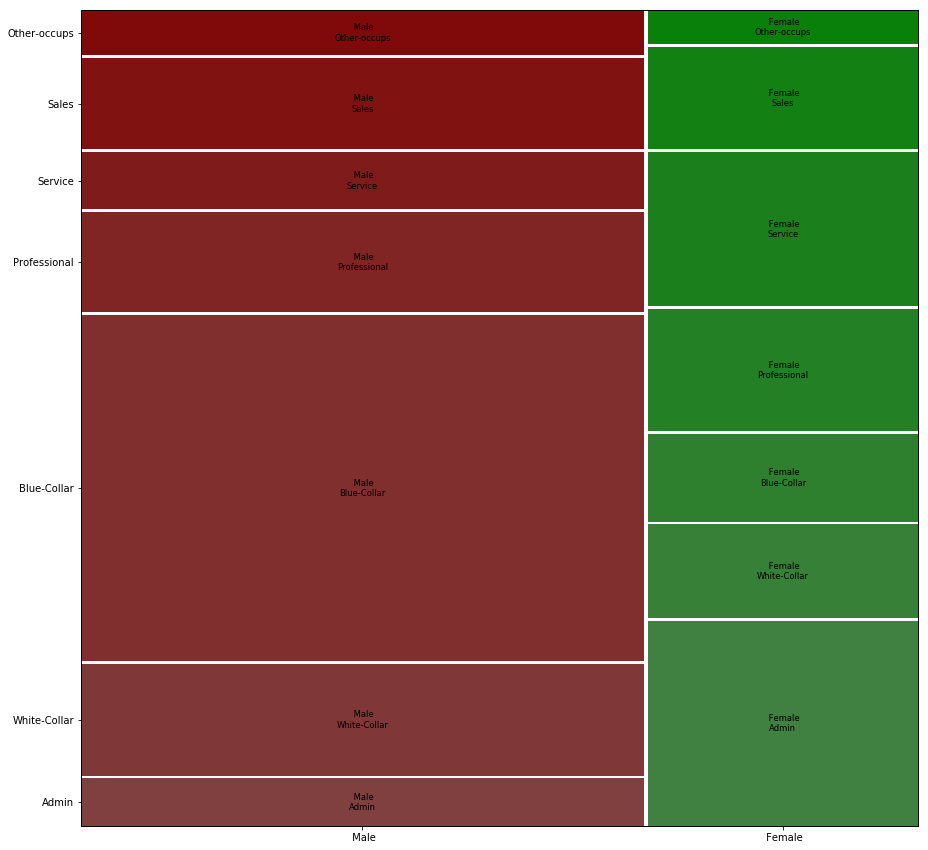

In [89]:
from statsmodels.graphics.mosaicplot import mosaic
fig, ax = plt.subplots(figsize=(15,15))
mosaic(dataBase, ["sex","occup"], ax) 
plt.show()

**Q** Quel graphique ci-dessus?  Quelle interprétation ? Quel est le test ci-dessous ? Que doit vérifier la table pour que ce test soit valide ? Quelle est l’hypothèse H0 testée ? Conclusion.

C'est un mosaic plot de la table de contingence entre les variables `sex` et `occup`. La superficie de chaque case est proportionnelle à l'effectif de la cellule associée. On observe alors que certaines catégories de métiers sont plus exercées par des hommes (`blue-Collar`=ouvrier) et d'autres par des femmes (`admin`). De plus, cela met en évidence les métiers les plus exercés au sein d'un même sexe.

In [27]:
from scipy.stats import chi2_contingency

chi2=chi2_contingency(pd.crosstab(dataBase["sex"],dataBase["occup"]))
print("test statistic : ",chi2[0])
print("p-value : ",chi2[1])

test statistic :  5164.706846627528
p-value :  0.0


Ce test est un test du Chi2. Il teste la liaison ou non entre les deux variables qualitatives `sex` et `occup` (H0 : les deux variables sont indépendantes en probabilité). Pour que ce test soit valide, il faut que tous les individus présentent une modalité et une seule et que chaque modalité soit observée au moins une fois.

La p-valeur de ce test étant nulle, on rejette H0, on considère donc que les deux variables sont liées.

**Q** Quel est le graphique ci-dessous? Comment interpréter? Quel test permettrait de confirmer ? Que dire de l’intérêt de cette variable [fnlwgt](http://web.cs.wpi.edu/~cs4341/C00/Projects/fnlwgt) (Final sampling weight)?

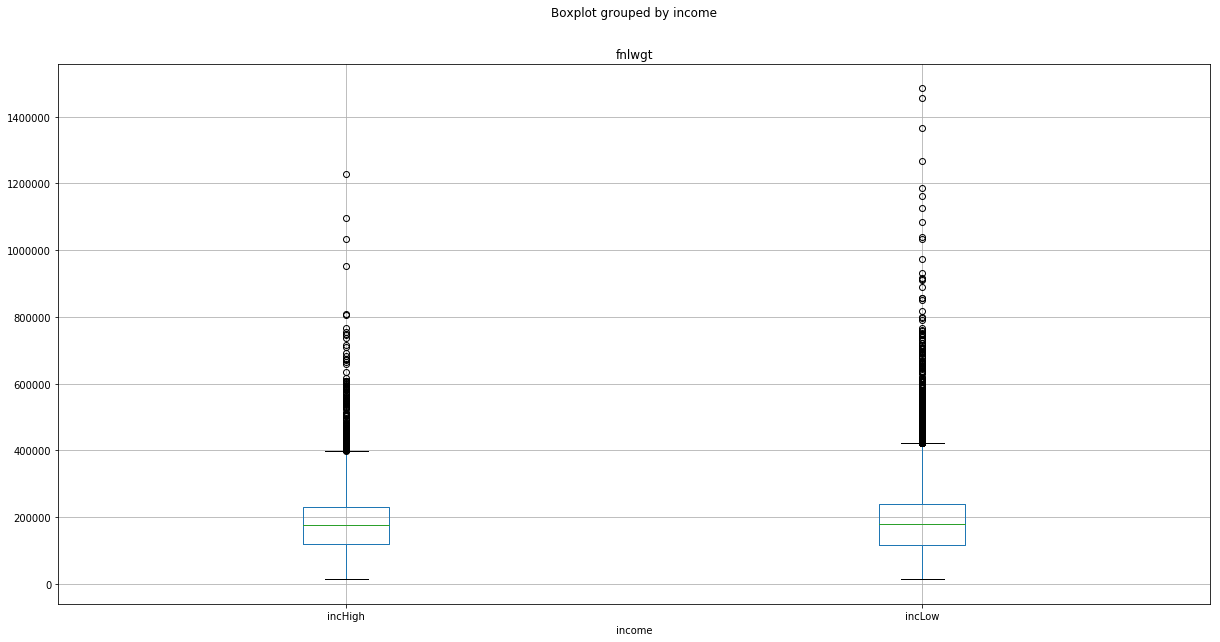

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
dataBase.boxplot('fnlwgt','income',ax)

Ce graphique est le boxplot de la variable `fnlwgt` expliquée en fonction de la variable `income` (revenus discretisés en 2 modalités). Les boxplots semblent relativement identiques, on peut donc supposer qu'il n'y a pas de liaisons entre ces deux variables. Pour confirmer cette hypothèse, on peut effectuer un test du chi2. 

Si il n'y a effectivement pas de liaison entre ces variables, on peut considérer que la variable `fnlwgt` n'a pas d'intérêt pour expliquer la répartition de la variable `income`.

**--------------------------------------A VERIFIER------------------------------------------**

**Q** Que dire dans la figure ci-dessous de la liaison entre les variables `educNum` et `age` et de la localisation des points noirs (>50k€) par rapport aux rouges (<50k€).

Text(0, 0.5, 'educNum')

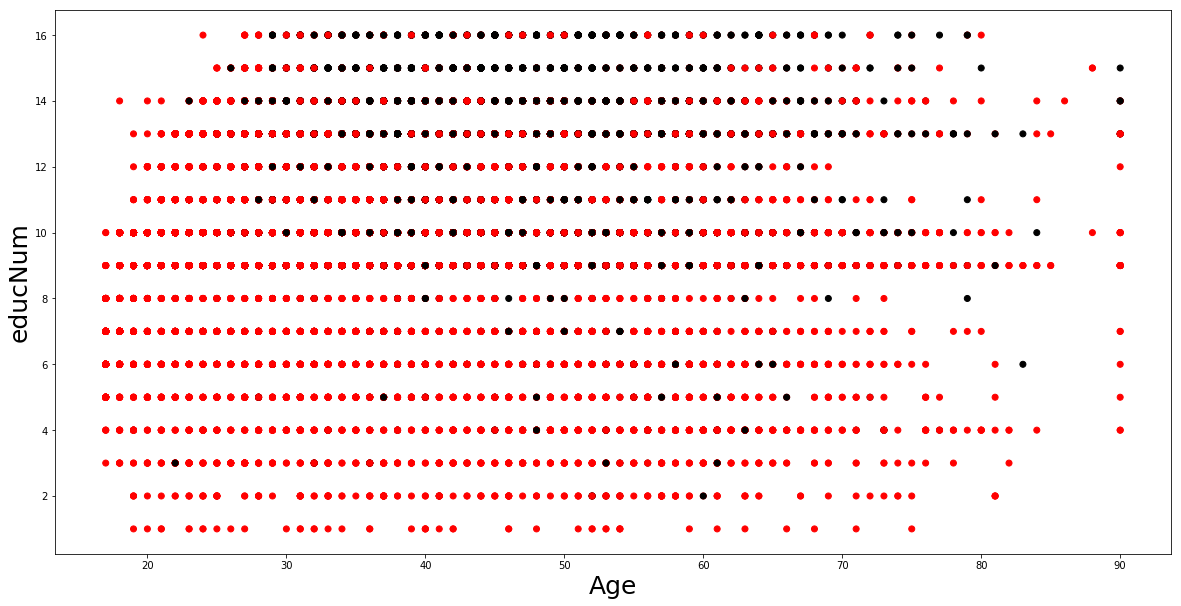

In [29]:
color_income = dataBase["income"].map({"incLow" : 'r', "incHigh" : "black"})
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(x=dataBase["Age"],y=dataBase["educNum"],c=color_income)
ax.set_xlabel("Age",size=25)
ax.set_ylabel("educNum",size=25)

Il ne semble pas avoir de forte liaison entre les variables `educNum` et `age`. Cependant, on observe un regroupement des points noirs (incHigh) dans la partie supérieure droite. 

On observe que le nombre de points noirs augmente avec le nombre d'années d'études. Les revenus augmentent avec le nombre d'années passées sur les bancs de l'école. De plus, on observe que le revenu augmente également avec l'âge, ce qui correspondrait aux agmentations acquises avec l'expérience professionelle. 

Les revenues augmentent donc avec le nombre d'années d'étude et l'expérience.

## 3 Analyse en composantes principales

**Q** Quelle est le graphe ci-dessous? Quel est le cercle?  A quoi sert-il ?

In [30]:
import sklearn.decomposition as sd
import sklearn.preprocessing as sp

pca = sd.PCA()
data = dataBase[["Age","fnlwgt","educNum","hoursWeek","LcapitalGain","LcapitalLoss"]]
C = pca.fit_transform(sp.scale(data))

/usr/local/insa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


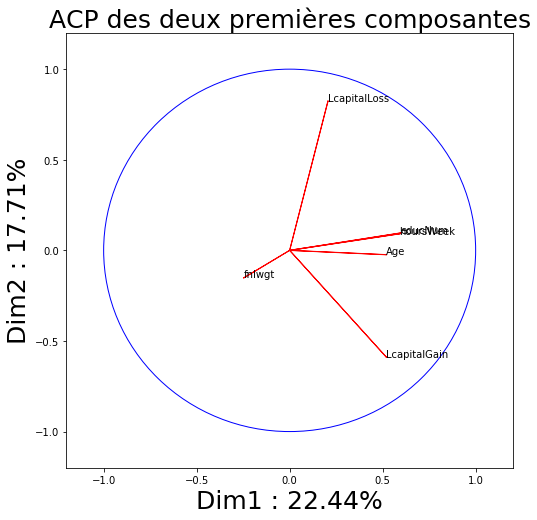

In [31]:
# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
ax.set_xlabel("Dim1 : " + str(round(pca.explained_variance_ratio_[:10][0]*100,2))+ "%" ,size=25)
ax.set_ylabel("Dim2 : " + str(round(pca.explained_variance_ratio_[:10][1]*100,2)) + "%",size=25)
ax.set_title("ACP des deux premières composantes",size=25)
plt.show()

Le graphe représente l'ACP des deux premières composantes principales. Avant de réaliser notre ACP, nous avons réduits nos données à la même échelles afin de pouvoir les placer sur le cercle des corrélations. Plus la variable se rapproche du cercle plus elle est bien représentée dans le plan factoriel et permet donc d'expliquer les composantes principales. 

Le premier axe représente le nombre d'année d'études + l'age + le nombre d'heures travaillées par semaine.
Le second axe représente le différence entre le capital perdu et le capital gagné sur les investissements en bourse. 

Le premier axe représente donc l'expérience professionnelle et le second les revenus.

**Q** La représentation ci-dessous montre un artefact avec 3 paquets d’individus. A quoi est dû cet artéfact ? Est-il utile à la compréhension des données ? 

Text(0.5, 1.0, 'Projection des individus dans le premier plan')

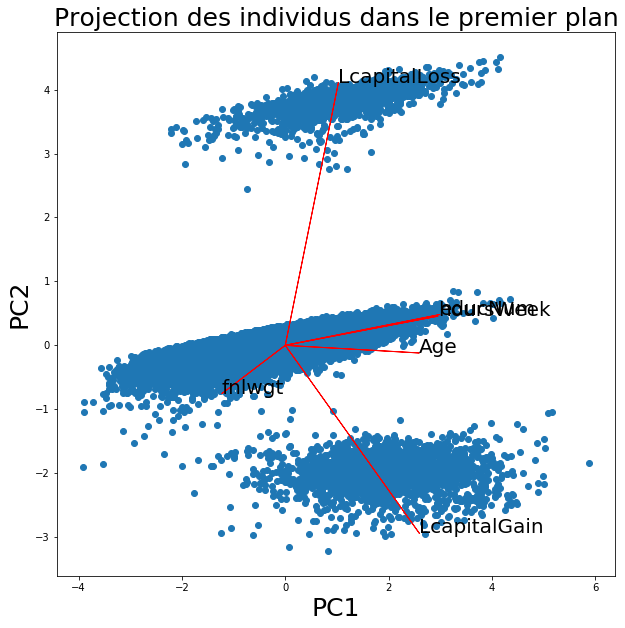

In [95]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(C[:,0], C[:,1])
for i, j, nom in zip(coord1,coord2, data.columns):
    ax.text(5*i, 5*j, nom, size=20)
    ax.arrow(0,0,5*i,5*j,color='r')
ax.set_xlabel("PC1" ,size=25)
ax.set_ylabel("PC2",size=25)
ax.set_title("Projection des individus dans le premier plan",size=25)

On observe trois groupes d'individus, ceux qui gagnent de l'argent en investissant en bourse en haut, ceux qui perdent de l'argent en investissant en bourse en bas et ceux qui n'investissent pas au centre.    
Cette représentation en 3 groupes provient de l'explication du second axe de l'ACP.

Ce graphe n'est pas particulièrement utile à la compréhension des données, il met en évidence un comportement logique. 

## 4 Analyse factorielle des correspondances de la table `occup` *vs.* `education`

**Q** Que conclure du test ci-dessous sur l’intérêt d’une analyse des correspondances? Quelle est la table étudiée, ses dimensions?

In [33]:
chi2=chi2_contingency(pd.crosstab(dataBase["occup"],dataBase["education"]))
print("test statistic : ",chi2[0])
print("p-value : ",chi2[1])

test statistic :  13376.183940661867
p-value :  0.0


Ce test est un test du Chi2. Il teste la liaison ou non entre les deux variables qualitatives `occup` et `education` (H0 : les deux variables sont indépendantes en probabilité).
La p-valeur de ce test étant nulle, on rejette H0, on considère donc que les deux variables sont liées. 

On peut donc faire l'AFC pour préciser la liaison entre les deux variables. On étudie alors la table de contingence des 2 variables de dimension 7x7 (7 modalités pour `occup` et 7 modalités pour `education`).

**%%%%%%%%%%%%%%%%%%%%%%%%%%REPONDRE AUX QUESTIONS%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%**

-> cf Cal4-Python-AFCM (tuto rudim) + ceux en R

**Q** Quelles sont les ACPs considérées dans cette analyse des correspondances, avec quelles métriques?

L'AFC effectue une double ACP du tableau disjonctif. On calcule l'ACP des profils-colonnes avec les métriques $D_r^{-1}$ et $D_c$ et on calcule l'ACP des profils-lignes avec les métriques $D_c^{-1}$ et $D_r$. La matrice $D_r$ est la matrice diagonale des fréquences par lignes et la matrice $D_c$ est la matrice diagonale des fréquences par colonnes.

**Q** Quelle est la matrice diagonalisée? 

La matrice diagonalisée dans l'AFC est le tableau de Burt mais ici, on effectue l'AFC sur le tableau disjonctif, ce qui est relativement identique.

**Q** Quelle est la signification des valeurs (%) présentes dans les légendes?

Les pourcentage dans les légendes représentent la part de chi2 expliqué.

**Q** Donner en une ligne une signification à l’Axe 1.

L'axe 1 représente le niveau d'étude et le niveau hiérarchique du métier exercé. Les niveaux d'éducation `bachelors`, `Masters`, `Doctorate` et `Prof-School` sont liés avec les métiers `Professional`, `White-Collar` et `Sales` au niveau de l'axe 1. Parallèment, les niveaux d'études inférieurs sont liés avec des métiers de salariés.

On fait l'ACP des profils-lignes et profils-colonnes du tableau disjonctif complet. 


In [96]:
from mca import MCA
df=dataBase[["occup","education"]]
df.head()
dc=pd.DataFrame(pd.get_dummies(df))
dc.head()

,occup_Admin,occup_Blue-Collar,occup_Other-occups,occup_Professional,occup_Sales,occup_Service,occup_White-Collar,education_Associates,education_Bachelors,education_Doctorate,education_Dropout,education_HS-Graduate,education_Masters,education_Prof-School
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [98]:
afc = MCA(dc,benzecri=False)

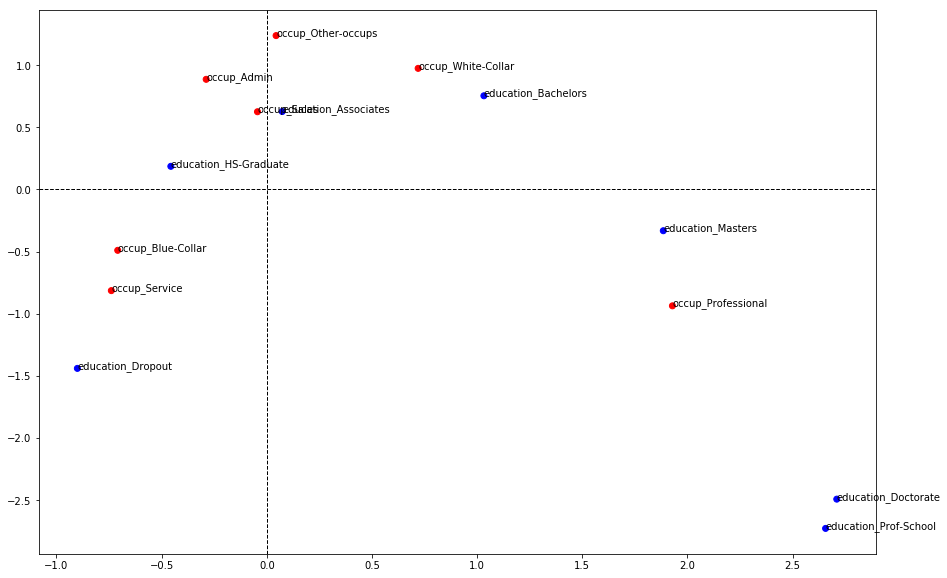

In [121]:
fig, ax = plt.subplots(figsize=(15,10))
dict_color = 7*["red"] + 7*["blue"]
ax.scatter(afc.fs_c()[:, 0], afc.fs_c()[:, 1], color=dict_color)
for i, j, nom in zip(afc.fs_c()[:, 0], afc.fs_c()[:, 1], dc.columns):
       ax.text(i, j, nom)
ax.axhline(c = 'black', linestyle = '--', linewidth = 1)
ax.axvline(c = 'black', linestyle = '--', linewidth = 1)
plt.show()

## 5 Analyse factorielle multiple des correspondances

**Q** La section 2 montre le peu d’intérêt de l’ACP. L’AFCM est donc utilisée. Quel prétraitement a été mis en œuvre pour y faire intervenir toutes les variables? Que faire des couples de variables posant problème (première section)?

Pour faire intervenir toutes les variables dans l'AFCM, on a transformé les variables quantitatives en variables qualitatives. Pour lse couples posant problème, nous décidons de ne considérer qu'une variable de chaque couple.


In [37]:
dataBaseQ = dataBase[["workClass","education","mariStat","occup","origEthn","sex","capitalGain","capitalLoss","income","ageQ","hoursWeekQ"]]

dataBaseQ["workClass"]=pd.Categorical(dataBaseQ["workClass"],ordered=False)
dataBaseQ["education"]=pd.Categorical(dataBaseQ["education"],ordered=False)
dataBaseQ["mariStat"]=pd.Categorical(dataBaseQ["mariStat"],ordered=False)
dataBaseQ["occup"]=pd.Categorical(dataBaseQ["occup"],ordered=False)
dataBaseQ["origEthn"]=pd.Categorical(dataBaseQ["origEthn"],ordered=False)
dataBaseQ["sex"]=pd.Categorical(dataBaseQ["sex"],ordered=False)
dataBaseQ["income"]=pd.Categorical(dataBaseQ["income"],ordered=False)

dataBaseQ.dtypes

workClass      category
education      category
mariStat       category
occup          category
origEthn       category
sex            category
capitalGain    category
capitalLoss    category
income         category
ageQ           category
hoursWeekQ     category
dtype: object

In [38]:
# Tableau disjonctif complet
D=pd.DataFrame(pd.get_dummies(dataBaseQ))
D.head()

,workClass_Federal-Govt,workClass_Not-Working,workClass_Other-Govt,workClass_Private,workClass_Self-Employed,education_Associates,education_Bachelors,education_Doctorate,education_Dropout,education_HS-Graduate,...,income_incHigh,income_incLow,ageQ_Ag1,ageQ_Ag2,ageQ_Ag3,ageQ_Ag4,ageQ_Ag5,hoursWeekQ_HW1,hoursWeekQ_HW2,hoursWeekQ_HW3
0,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [39]:
# AFCM de toutes les variables qualitatives
afcm = MCA(D,benzecri=False)

**Q** Combien d’axes est-il raisonnable de retenir selon la figure ci-dessous? 

Selon l'ébouli des valeurs propres, on ne considère que les 2 premiers axes.

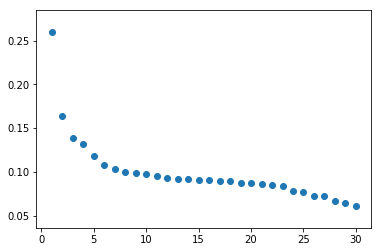

In [40]:
#Ebouli des valeurs propres
plt.scatter(range(1,31),afcm.L[:30])

**Q** Comment interpréter les axes 1 et 2 ci-dessous? Que signifient les valeurs (%)?

Il est difficile d'interpréter les axes directement. Cependant, on observe sur la diagonale montante que le revenu et le niveau d'éducation sont fortement liés (cf AFC) et sur la diagonale descendante, le sexe, la profession exercée et le nombre d'heure travaillée sont liés. Ces deux diagonales étant orthogonales, cela met en évidence une discrimination. On observe que les femmes se voient confier des postes à moindre responsabilité et avec moins d'heures de travail. Alors qu'il n'y a pas de différences de répartition entre hommes et femmes pour le niveau d'études, il y a tout de même une répartition inégale des responsabilités entre sexes.

Les pourcentages des axes représentent l'inertie du nuage de valeurs propres. Elles ne sont pas des indicateurs de qualité pour l'AFCM.

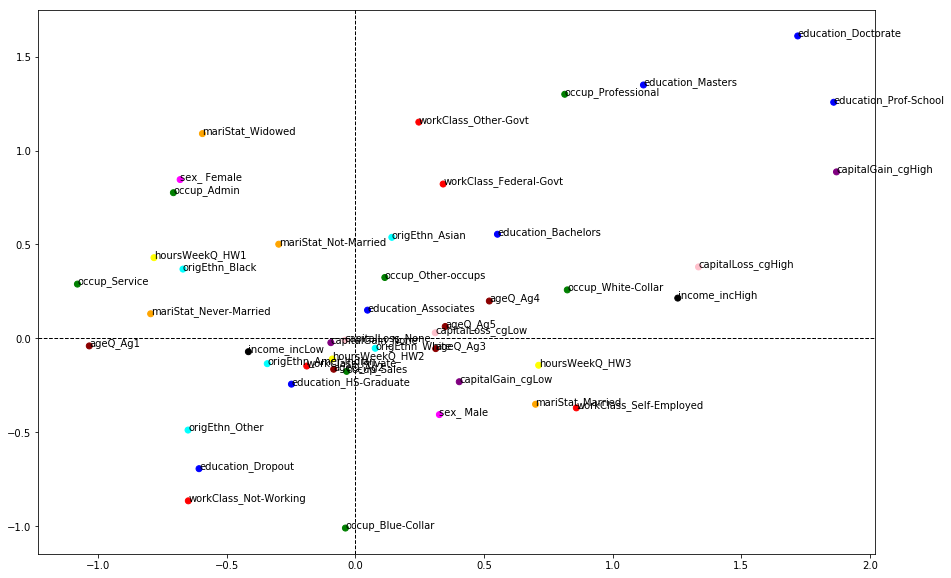

In [122]:
fig, ax = plt.subplots(figsize=(15,10))
dict_color=5*["red"]+7*["blue"]+4*["orange"]+7*["green"]+5*["cyan"]+2*["magenta"]+3*["purple"]+3*["pink"]+2*["black"]+5*["darkred"]+3*["yellow"]
ax.scatter(afcm.fs_c()[:, 0], -afcm.fs_c()[:, 1], color=dict_color)
for i, j, nom in zip(afcm.fs_c()[:, 0], -afcm.fs_c()[:, 1], D.columns):
       ax.text(i, j, nom)
ax.axhline(c = 'black', linestyle = '--', linewidth = 1)
ax.axvline(c = 'black', linestyle = '--', linewidth = 1)
plt.show()

**Q** A partir de quelle AFC et donc de quelle ACP, quelle SVD le graphe ci-dessous a-t-il été obtenu?  La discrimination des individus de revenus inférieurs ou supérieurs à 50k€ sera-t-elle aisée ?

In [42]:
afcm_r = afcm.fs_r()

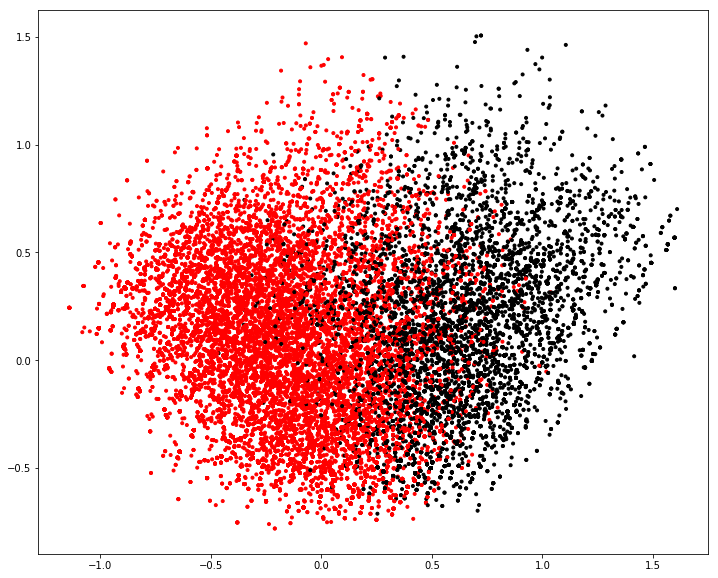

In [43]:
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(afcm_r[:, 0], -afcm_r[:, 1], c=color_income, marker=".")

### Avec Prince

In [44]:
#import prince
#mca=prince.MCA()
#afcm=mca.fit(dataBaseQ)
#mca.plot_coordinates(dataBaseQ,show_row_points=False)

In [45]:
#mca.plot_coordinates(dataBaseQ,show_column_points=False)

## 6 Classification non supervisée

**Q** Pourquoi la classification ascendante hiérarchique  des données précédentes ne marche-t-elle  pas sur un ordinateur portable  basique? Quelle stratégie faudrait-il mettre en œuvre?

**Q** Les commandes suivantes sont plus simplement exécutées. Quelle astuce est mise en œuvre? Comment choisir le nombre de classes?

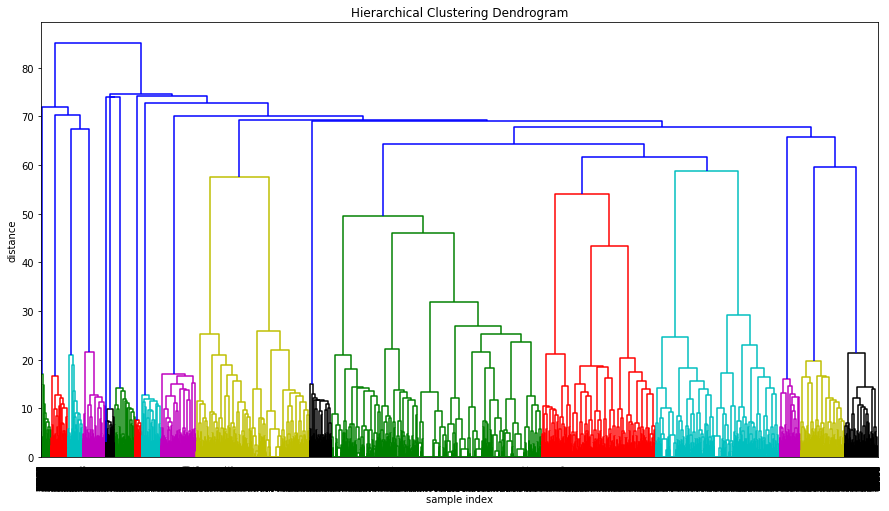

In [46]:
import scipy.cluster.hierarchy as sch
ZZ = sch.linkage(afcm_r, 'ward')
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
sch.dendrogram(ZZ,leaf_font_size=8.)
plt.show()

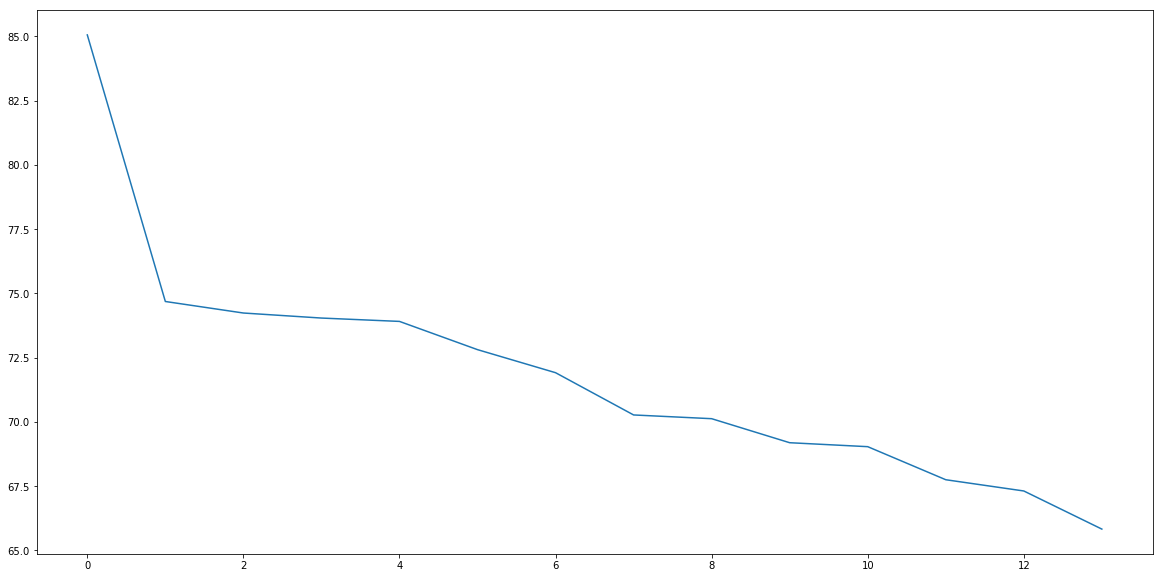

In [47]:
plt.figure(figsize=(20, 10))
plt.plot(sch.maxdists(ZZ)[::-1][0:14])
plt.show()

Représentation des classes

In [49]:
from sklearn.cluster import *
Classe = k_means(afcm_r,5)

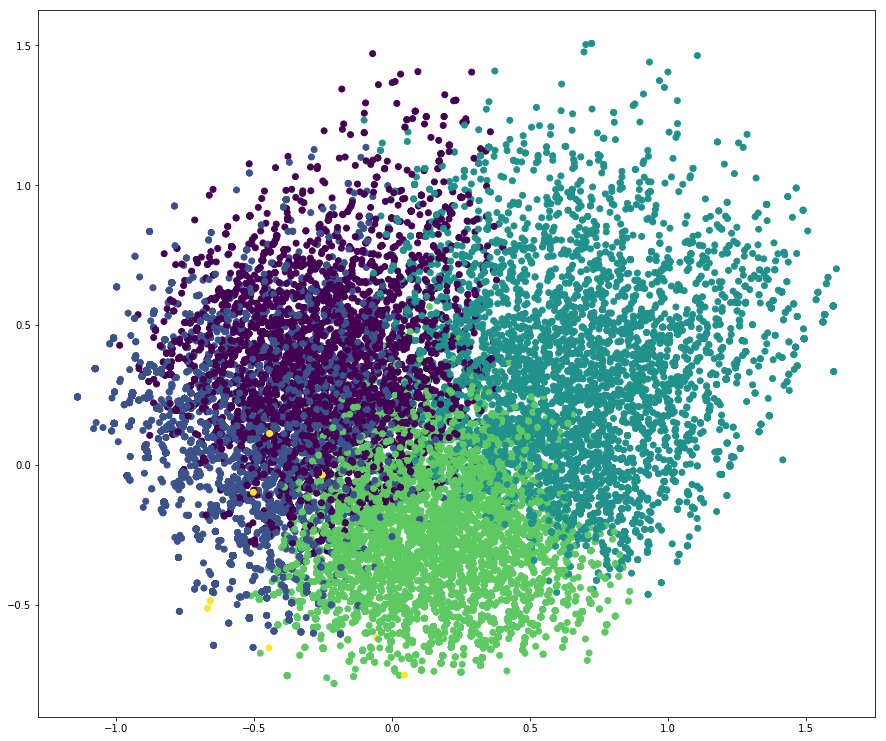

In [50]:
fig = plt.figure(1, figsize=(15, 13))
# Représentation des classes dans les composantes de l'AFCM
plt.scatter(afcm_r[:, 0], -afcm_r[:, 1],c=Classe[1])
plt.show()

**Q** Expliquer comment les commandes ci-dessous permettent de construire une interprétation des classes. Interpréter ces classes.

On crée un nouveau dataFrame où on rajoute la classe affectée à chaque individu.

In [71]:
dataBaseClasse = dataBaseQ.copy()
dataBaseClasse["classe"] = Classe[1]
dataBaseClasse.head()

,workClass,education,mariStat,occup,origEthn,sex,capitalGain,capitalLoss,income,ageQ,hoursWeekQ,classe
0,Other-Govt,Bachelors,Never-Married,Admin,White,Male,cgLow,None,incLow,Ag3,HW2,0
1,Self-Employed,Bachelors,Married,White-Collar,White,Male,None,None,incLow,Ag4,HW1,2
2,Private,HS-Graduate,Not-Married,Blue-Collar,White,Male,None,None,incLow,Ag3,HW2,3
3,Private,Dropout,Married,Blue-Collar,Black,Male,None,None,incLow,Ag5,HW2,3
4,Private,Bachelors,Married,Professional,Black,Female,None,None,incLow,Ag2,HW2,0


On renomme le nom des classes.

In [72]:
cat_Classe={0 : "C0",
            1 : "C1",
            2 : "C2",
            3 : "C3",
            4 : "C4"}
dataBaseClasse["classe"]=dataBaseClasse.classe.map(cat_Classe)

In [73]:
dataBaseClasse.head()

,workClass,education,mariStat,occup,origEthn,sex,capitalGain,capitalLoss,income,ageQ,hoursWeekQ,classe
0,Other-Govt,Bachelors,Never-Married,Admin,White,Male,cgLow,None,incLow,Ag3,HW2,C0
1,Self-Employed,Bachelors,Married,White-Collar,White,Male,None,None,incLow,Ag4,HW1,C2
2,Private,HS-Graduate,Not-Married,Blue-Collar,White,Male,None,None,incLow,Ag3,HW2,C3
3,Private,Dropout,Married,Blue-Collar,Black,Male,None,None,incLow,Ag5,HW2,C3
4,Private,Bachelors,Married,Professional,Black,Female,None,None,incLow,Ag2,HW2,C0


In [74]:
dataBaseClasse["classe"]=pd.Categorical(dataBaseClasse["classe"],ordered=False)
dataBaseClasse.dtypes

workClass      category
education      category
mariStat       category
occup          category
origEthn       category
sex            category
capitalGain    category
capitalLoss    category
income         category
ageQ           category
hoursWeekQ     category
classe         category
dtype: object

In [75]:
# Tableau disjonctif complet
D_Classe = pd.DataFrame(pd.get_dummies(dataBaseClasse))
D_Classe.head()

,workClass_Federal-Govt,workClass_Not-Working,workClass_Other-Govt,workClass_Private,workClass_Self-Employed,education_Associates,education_Bachelors,education_Doctorate,education_Dropout,education_HS-Graduate,...,ageQ_Ag4,ageQ_Ag5,hoursWeekQ_HW1,hoursWeekQ_HW2,hoursWeekQ_HW3,classe_C0,classe_C1,classe_C2,classe_C3,classe_C4
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [76]:
# AFCM de toutes les variables qualitatives
afcm_Classe = MCA(D_Classe, benzecri=False)

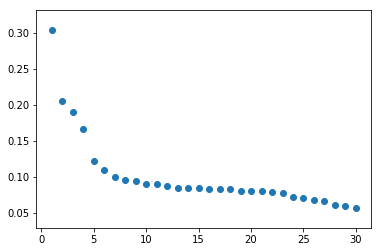

In [77]:
#Ebouli des valeurs propres
plt.scatter(range(1,31),afcm_Classe.L[:30])

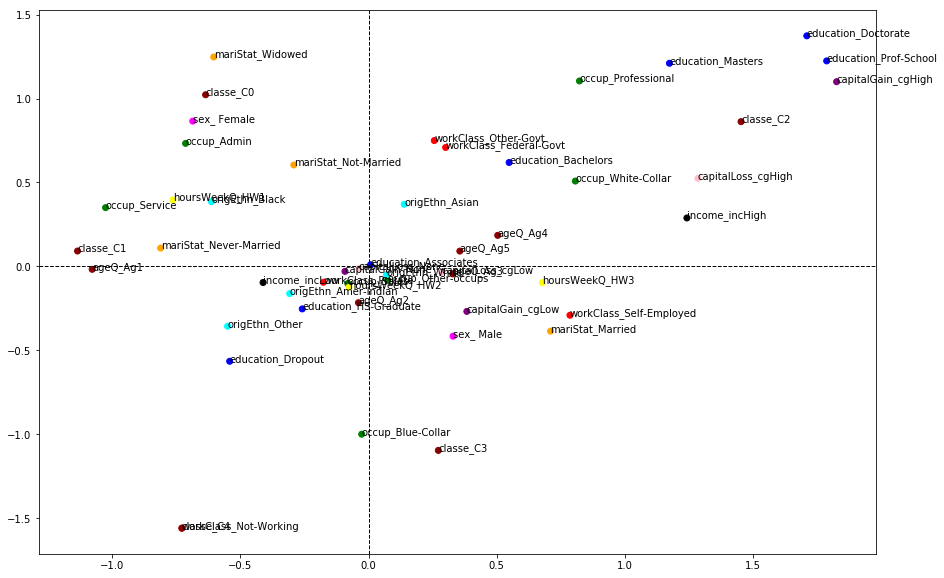

In [123]:
fig, ax = plt.subplots(figsize=(15,10))
dict_color=5*["red"]+7*["blue"]+4*["orange"]+7*["green"]+5*["cyan"]+2*["magenta"]+3*["purple"]+3*["pink"]+2*["black"]+5*["darkred"]+3*["yellow"]+5*["darkred"]
ax.scatter(afcm_Classe.fs_c()[:, 0],-afcm_Classe.fs_c()[:, 1],color=dict_color)
for i, j, nom in zip(afcm_Classe.fs_c()[:, 0], -afcm_Classe.fs_c()[:, 1], D_Classe.columns):
       ax.text(i, j, nom)
ax.axhline(c = 'black', linestyle = '--', linewidth = 1)
ax.axvline(c = 'black', linestyle = '--', linewidth = 1)
plt.show()